In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [2]:
df = pd.read_csv('data_012822')
x = np.arange(2048)

# Section 5.4

In [26]:
ugradio.dft.dft??

In [28]:
len(df['data_%s'%('2200')])

2048

In [6]:
def volt_spec(sample, sampling_rate):
    data = df['data_%s'%(sample)]
    Nfreq=int(10*len(data))
    fourier = ugradio.dft.dft(
        data,
        f=np.linspace(-sampling_rate/2.,sampling_rate/2.,num=Nfreq,endpoint=False),
        vsamp=sampling_rate
    )
    return fourier

def power_spec(sample, sampling_rate): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample, sampling_rate)
    return volt[0], np.abs(volt[1])**2 #returns power spectrum of specified frequencies

<IPython.core.display.Javascript object>


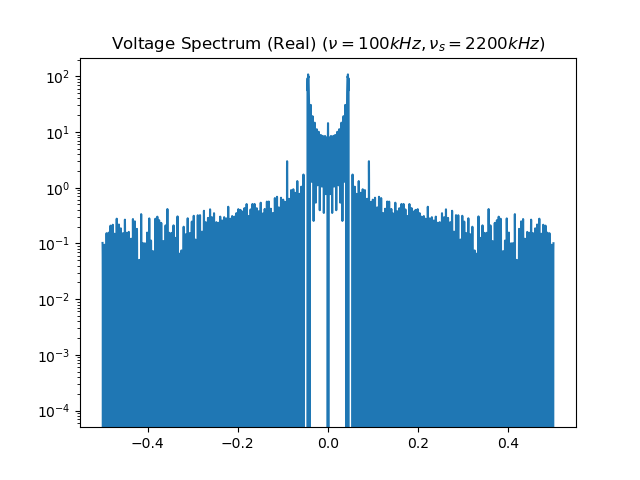

In [22]:
volt_2200 = volt_spec('2200', 1)
plt.figure()
plt.title(r'Voltage Spectrum (Real) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].real)

<IPython.core.display.Javascript object>


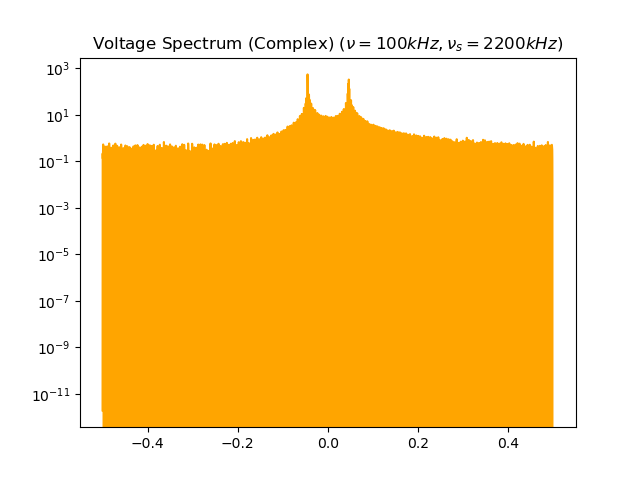

In [21]:
plt.figure()
plt.title(r'Voltage Spectrum (Complex) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].imag, color = 'orange')

<IPython.core.display.Javascript object>


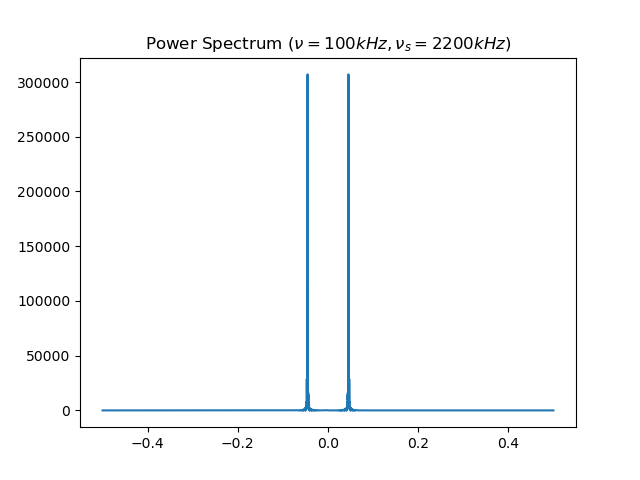

In [11]:
power_2200 = power_spec('2200', 1)
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.plot(power_2200[0], power_2200[1].real)

<IPython.core.display.Javascript object>


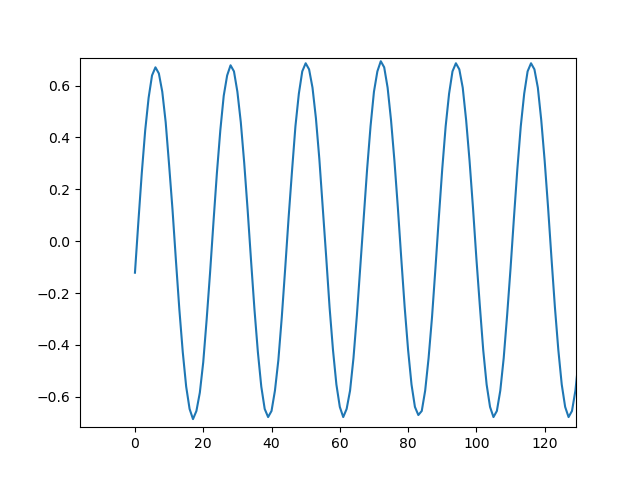

In [51]:
data = df['data_%s'%('2200')]
plt.figure()
plt.plot(data)
plt.show()

# Section 5.6

In [24]:
def volt_spec_W(sample, sampling_rate, W):
    data = df['data_%s'%(sample)]
    #Nfreq=int(10*len(data))
    fourier = ugradio.dft.dft(
        data,
        f=np.linspace(-W*sampling_rate/2.,W*sampling_rate/2.,endpoint=False),
        vsamp=sampling_rate
    )
    return fourier

def power_spec_W(sample, sampling_rate, W): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec_W(sample, sampling_rate, W)
    return volt[0], np.abs(volt[1])**2 #returns power spectrum of specified frequencies

<IPython.core.display.Javascript object>


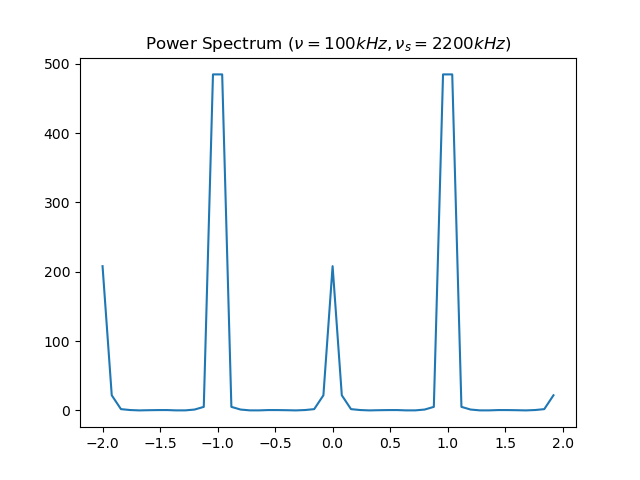

In [36]:
power_2200_W = power_spec_W('2200', 1, 4)
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.plot(power_2200_W[0], power_2200_W[1])